In [12]:


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')



In [13]:


def RSI(series, n=14):
    # WARNING - Feed data in ascending order only (i.e. first row should be your oldest print)
    
    # Get the difference in price from previous price
    series = series.copy().diff()

    # Get upwards and downwards gains
    up, down = series.copy(), series.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    # Calculate the exponential weighted values
    roll_up1 = up.ewm(span=n,min_periods=0,adjust=False,ignore_na=False).mean()
    roll_down1 = down.abs().ewm(span=n,min_periods=0,adjust=False,ignore_na=False).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    return(RSI1)



In [14]:


# note on moving averages
price_action = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,10]
np.mean(price_action)



1.6538461538461537

In [15]:


spy_df = pd.read_csv('final_dataset.csv')
spy_df['date'] = pd.to_datetime(spy_df['date'])
spy_df = spy_df[['date', 'adj_close']]
spy_df.columns = ['date', 'close']
print('spy_df:', np.min(spy_df['date']), np.max(spy_df['date']))
spy_df.tail(10)

spy_df: 2015-01-07 00:00:00 2020-12-03 00:00:00


,date,close
58690,2020-03-25,125.500000
58691,2020-03-26,128.750000
58692,2020-03-27,128.050003
58693,2020-03-30,125.650001
58694,2020-03-31,123.949997
58695,2020-01-04,120.900001
58696,2020-03-04,124.349999
58697,2020-07-04,140.899994
58698,2020-08-04,143.149994
58699,2020-09-04,149.850006


In [16]:
spy_df.head()

,date,close
0,2015-01-07,303.809296
1,2015-02-07,308.445007
2,2015-03-07,313.080688
3,2015-06-07,312.397553
4,2015-07-07,325.035919


In [17]:


# Window length for moving average
n = 14
spy_df['RSI1'] = RSI(spy_df['close'], n)
spy_df.head()



,date,close,RSI1
0,2015-01-07,303.809296,NaN
1,2015-02-07,308.445007,100.000000
2,2015-03-07,313.080688,100.000000
3,2015-06-07,312.397553,97.783123
4,2015-07-07,325.035919,98.495228


0         0.000000
1         0.369800
2         1.025114
3         1.472358
4         2.814174
           ...    
58695   -30.157995
58696   -29.059619
58697   -26.547678
58698   -24.097607
58699   -21.368946
Name: MACD, Length: 58700, dtype: float64


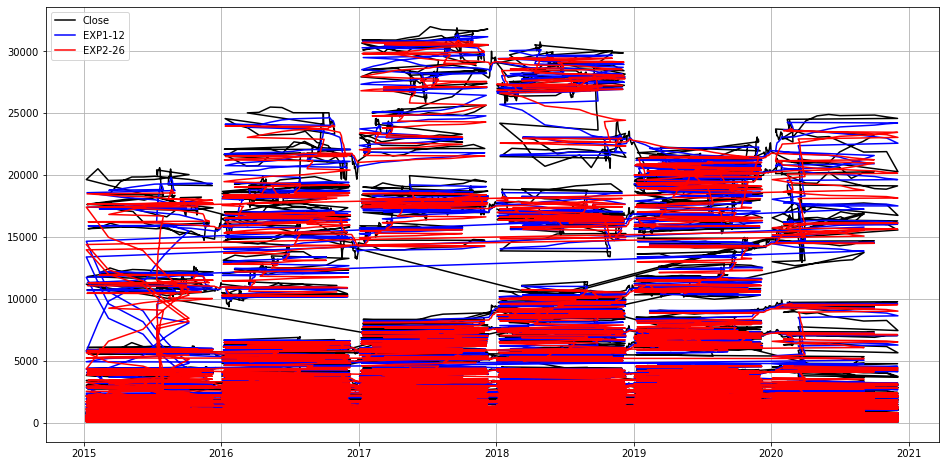

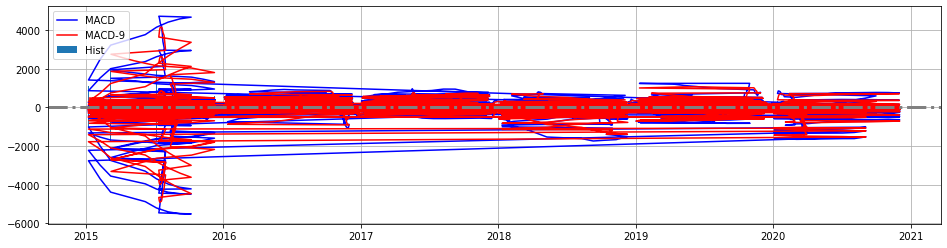

In [19]:
# cut_off_date = '2015-07-01' 
# spy_df = spy_df[spy_df['date'] >= cut_off_date]

# Price chart
fig, ax = plt.subplots(figsize=(16, 8))
spy_df['EXP1'] = spy_df['close'].ewm(span=12, adjust=False).mean()
spy_df['EXP2'] = spy_df['close'].ewm(span=26, adjust=False).mean()
spy_df['MACD'] = spy_df['EXP1']-spy_df['EXP2']
print(spy_df['MACD'])
spy_df['MACD'].to_csv('my_csv12.csv', mode='a', header=True)
spy_df['EXP3'] = spy_df['MACD'].ewm(span=9, adjust=False).mean()
spy_df['MACD_Hist'] = spy_df['MACD'] - spy_df['EXP3']

plt.plot(spy_df['date'], spy_df['close'], label='Close', color='black')
plt.plot(spy_df['date'], spy_df['EXP1'], label='EXP1-12', color='blue')
plt.plot(spy_df['date'], spy_df['EXP2'], label='EXP2-26', color='red')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Histogram chart
fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(spy_df['date'], spy_df['MACD_Hist'] , width=1, label='Hist')
ax.xaxis_date
plt.plot(spy_df['date'],  spy_df['MACD'], label='MACD',color='blue')
plt.plot(spy_df['date'],  spy_df['EXP3'], label='MACD-9',color='red')
plt.axhline(0, color='gray', linewidth=3, linestyle='-.' )
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [21]:
# create an MACD indicators
def Plot_MACD(df, feature, fast=9, medium=12, long=26):
    # WARNING - Feed data in ascending order only (i.e. first row should be your oldest print)
    
    tmp_df = df.copy()
    
    # Price chart
    fig, ax = plt.subplots(figsize=(16, 8))
    tmp_df['EXP1'] = tmp_df[feature].ewm(span=medium, adjust=False).mean()
    tmp_df['EXP2'] = tmp_df[feature].ewm(span=long, adjust=False).mean()
    
    tmp_df['MACD'] = tmp_df['EXP1']-tmp_df['EXP2']
#     tmp_df['MACD'].to_csv('my_csv13.csv', mode='a', header=True)
    print(tmp_df['MACD'])
    tmp_df['EXP3'] = tmp_df['MACD'].ewm(span=fast, adjust=False).mean()
    tmp_df['MACD_Hist'] = tmp_df['MACD'] - tmp_df['EXP3']

    plt.plot(tmp_df['date'], tmp_df[feature], label='Price', color='black')
    plt.plot(tmp_df['date'], tmp_df['EXP1'], label='EXP1-12', color='blue')
    plt.plot(tmp_df['date'], tmp_df['EXP2'], label='EXP2-26', color='red')
    plt.title('MACD - ' + str(feature))
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

    # Histogram chart
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.bar(tmp_df['date'], tmp_df['MACD_Hist'] , width=1, label='Hist')
    ax.xaxis_date
    plt.plot(tmp_df['date'],  tmp_df['MACD'], label='MACD',color='blue')
    plt.plot(tmp_df['date'],  tmp_df['EXP3'], label='MACD-9',color='red')
    plt.axhline(0, color='gray', linewidth=3, linestyle='-.' )
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

1136        0.000000
1155       -6.820915
2310      115.677071
2329      206.920990
3484      189.250319
            ...     
56333    -331.853197
57488    1588.194978
57507    2730.978208
58662    1996.450787
58681    1394.912201
Name: MACD, Length: 100, dtype: float64


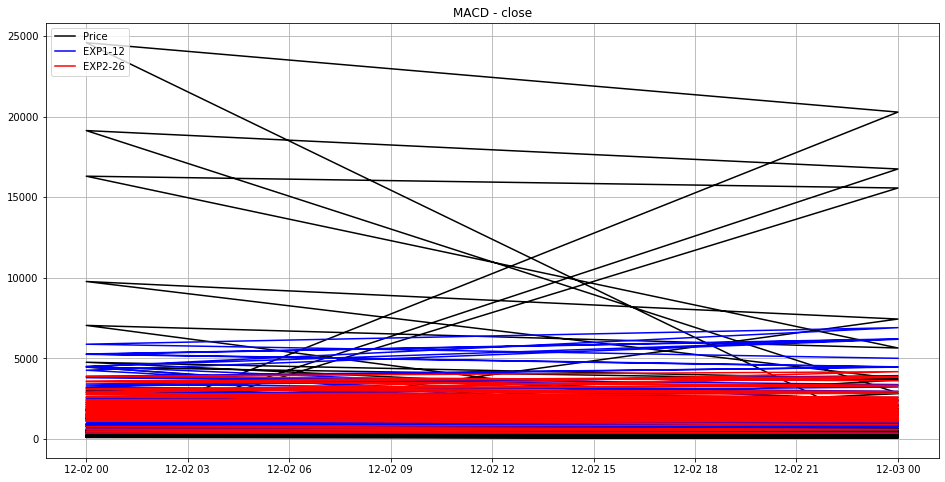

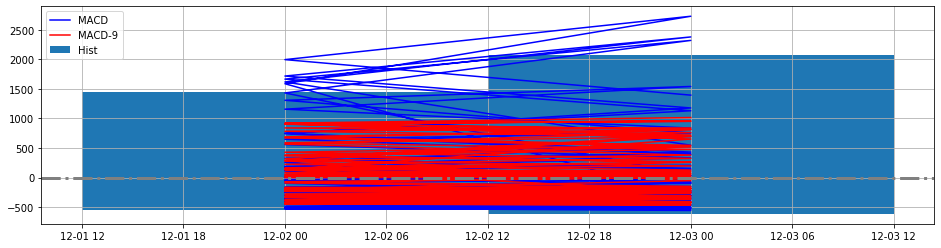

In [30]:


Plot_MACD(spy_df[spy_df['date'] >'2020-11-03'], 'close')

